# ShanghaiTech visualize annotation

In this kernel, we will visualize anotation point for some image in ShanghaiTech dataset.
The visualization include: 

- The image
- The image with red-dot annotated 
- Density map generated from image and anotatation

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['shanghaitech_with_people_density_map']


In [2]:
from matplotlib import cm as CM
import PIL.Image as Image
import os
import h5py
import scipy
from scipy.io import loadmat
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
# print(os.listdir("../input/shanghaitech_with_people_density_map/ShanghaiTech/part_A/train_data/ground-truth/"))

# File path 

- image_path: jpg file
- mat_path: mat file contain annotation, usually included in dataset 
- density map: generated from image and anotatation by method propose by  Single-Image Crowd Counting via Multi-Column Convolutional Neural Network (CVPR2016). Check demo code here: https://www.kaggle.com/tthien/shanghaitech-a-train-density-gen#L23 

In [4]:

image_path = "../input/shanghaitech_with_people_density_map/ShanghaiTech/part_A/test_data/images/IMG_176.jpg"
density_map_path = "../input/shanghaitech_with_people_density_map/ShanghaiTech/part_A/test_data/ground-truth-h5/IMG_176.h5"
mat_path = "../input/shanghaitech_with_people_density_map/ShanghaiTech/part_A/test_data/ground-truth/GT_IMG_176.mat"

# Image

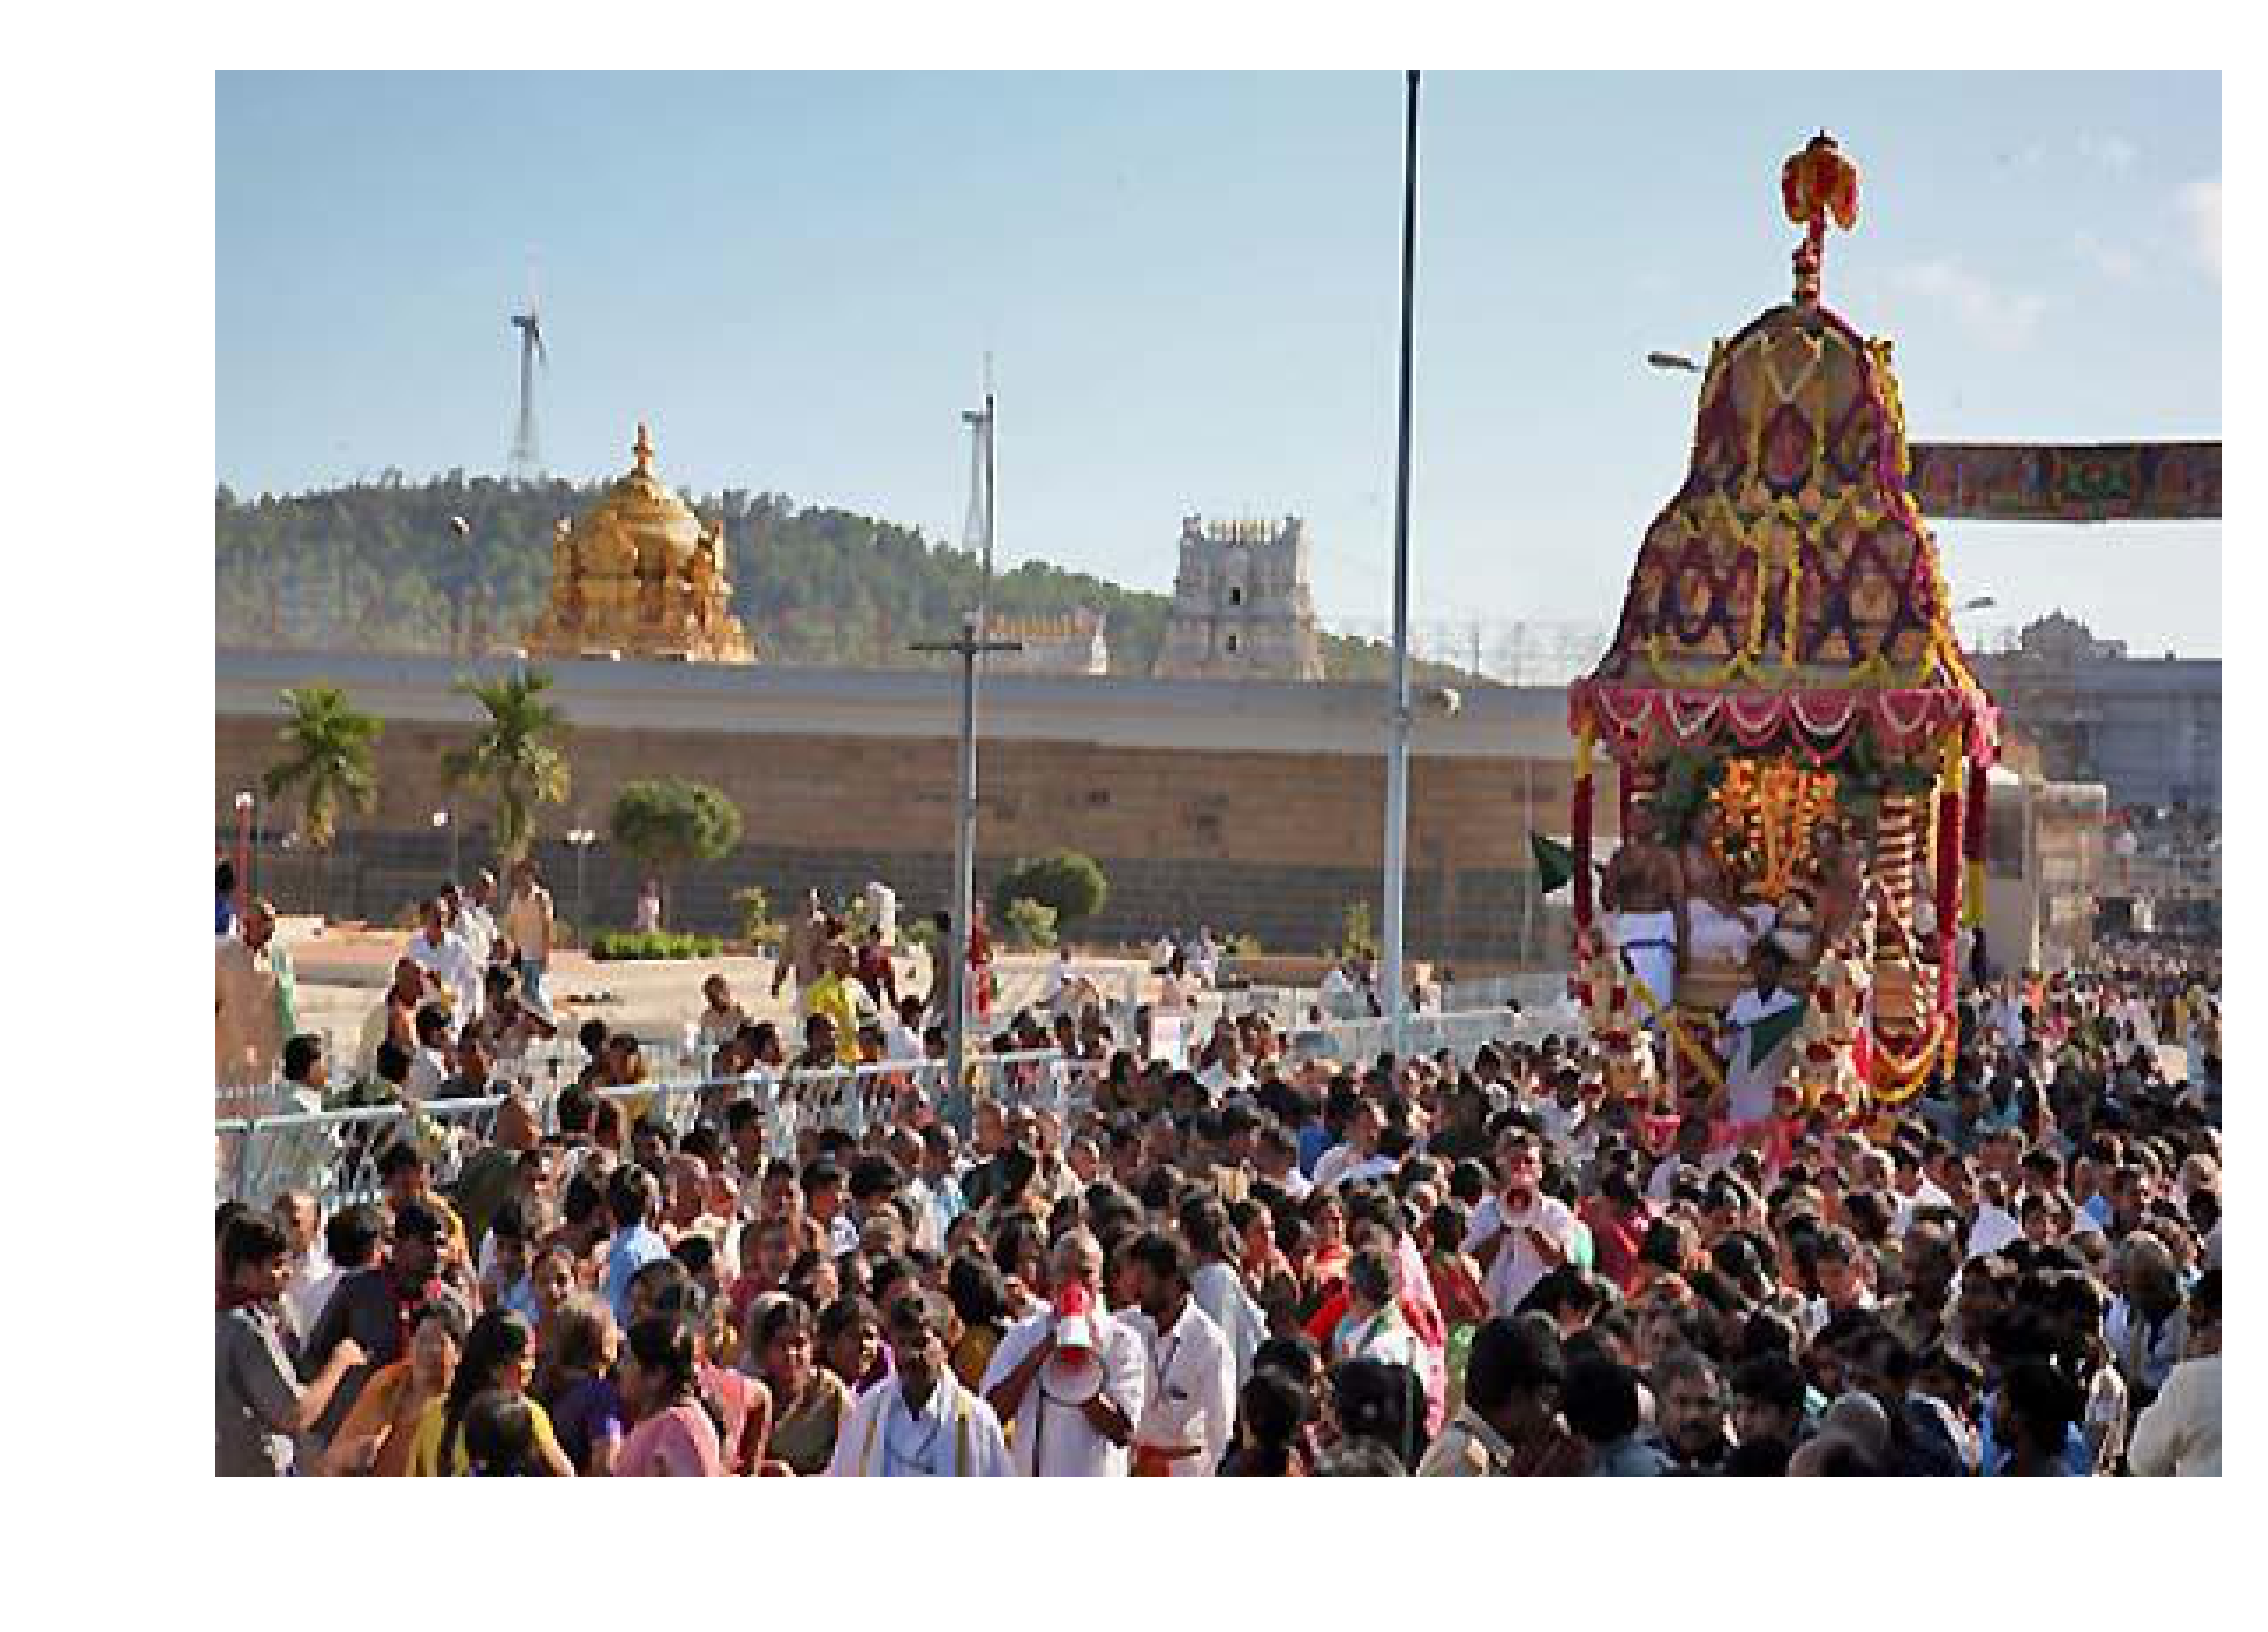

In [5]:
from matplotlib import pyplot as plt

#now see a sample from ShanghaiA
plt.figure(dpi=600)
plt.axis('off')
plt.margins(0,0)
plt.imshow(Image.open(image_path))

In [6]:
img = Image.open(image_path)
img_matrix = np.array(img)
img_matrix.shape

(400, 570, 3)

# Density Map

In [7]:
# gt_file = h5py.File(density_map_path,'r')
# groundtruth = np.asarray(gt_file['density'])
# plt.figure(dpi=600)
# plt.axis('off')
# plt.imshow(groundtruth,cmap=CM.jet)

In [8]:
# groundtruth.shape

In [9]:
def show_density(density, name):
    plt.figure(dpi=600)
    plt.axis('off')
    plt.margins(0, 0)
    
    plt.imshow(density, cmap=CM.jet)
    plt.savefig(name, dpi=600, bbox_inches='tight', pad_inches=0)

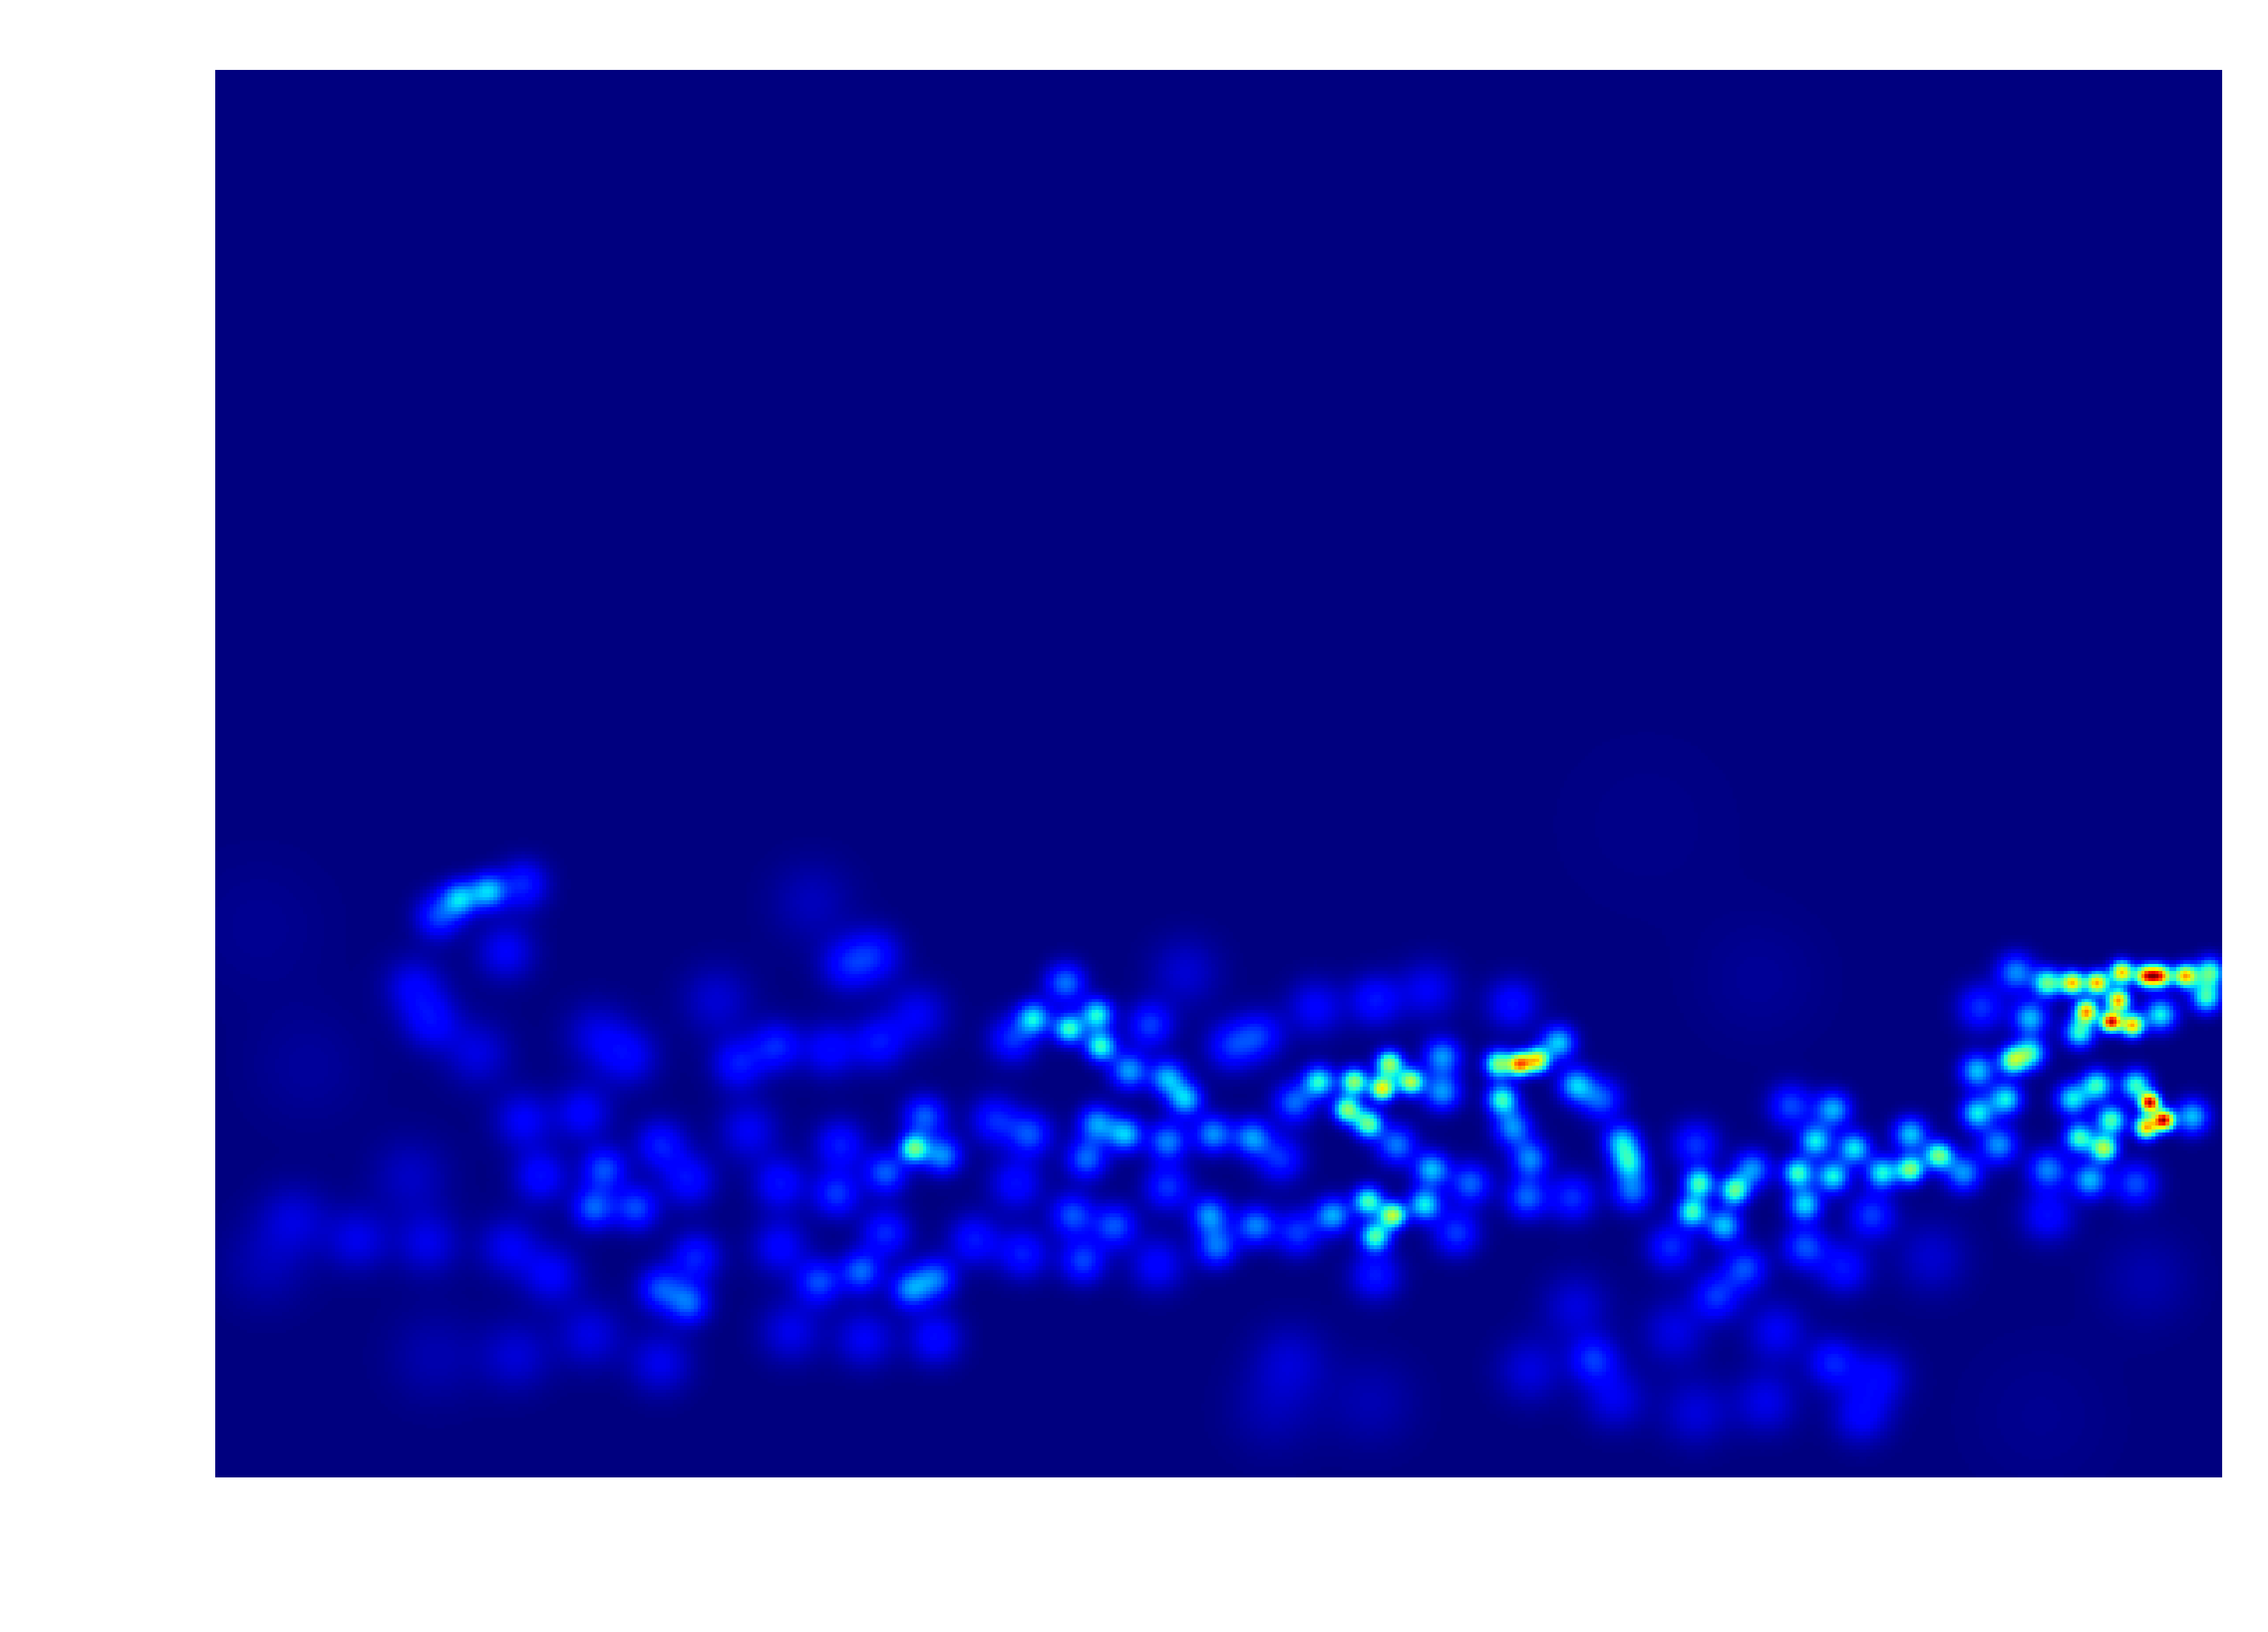

In [10]:
gt_file = h5py.File(density_map_path,'r')
groundtruth = np.asarray(gt_file['density'])
show_density(groundtruth, "density.png")

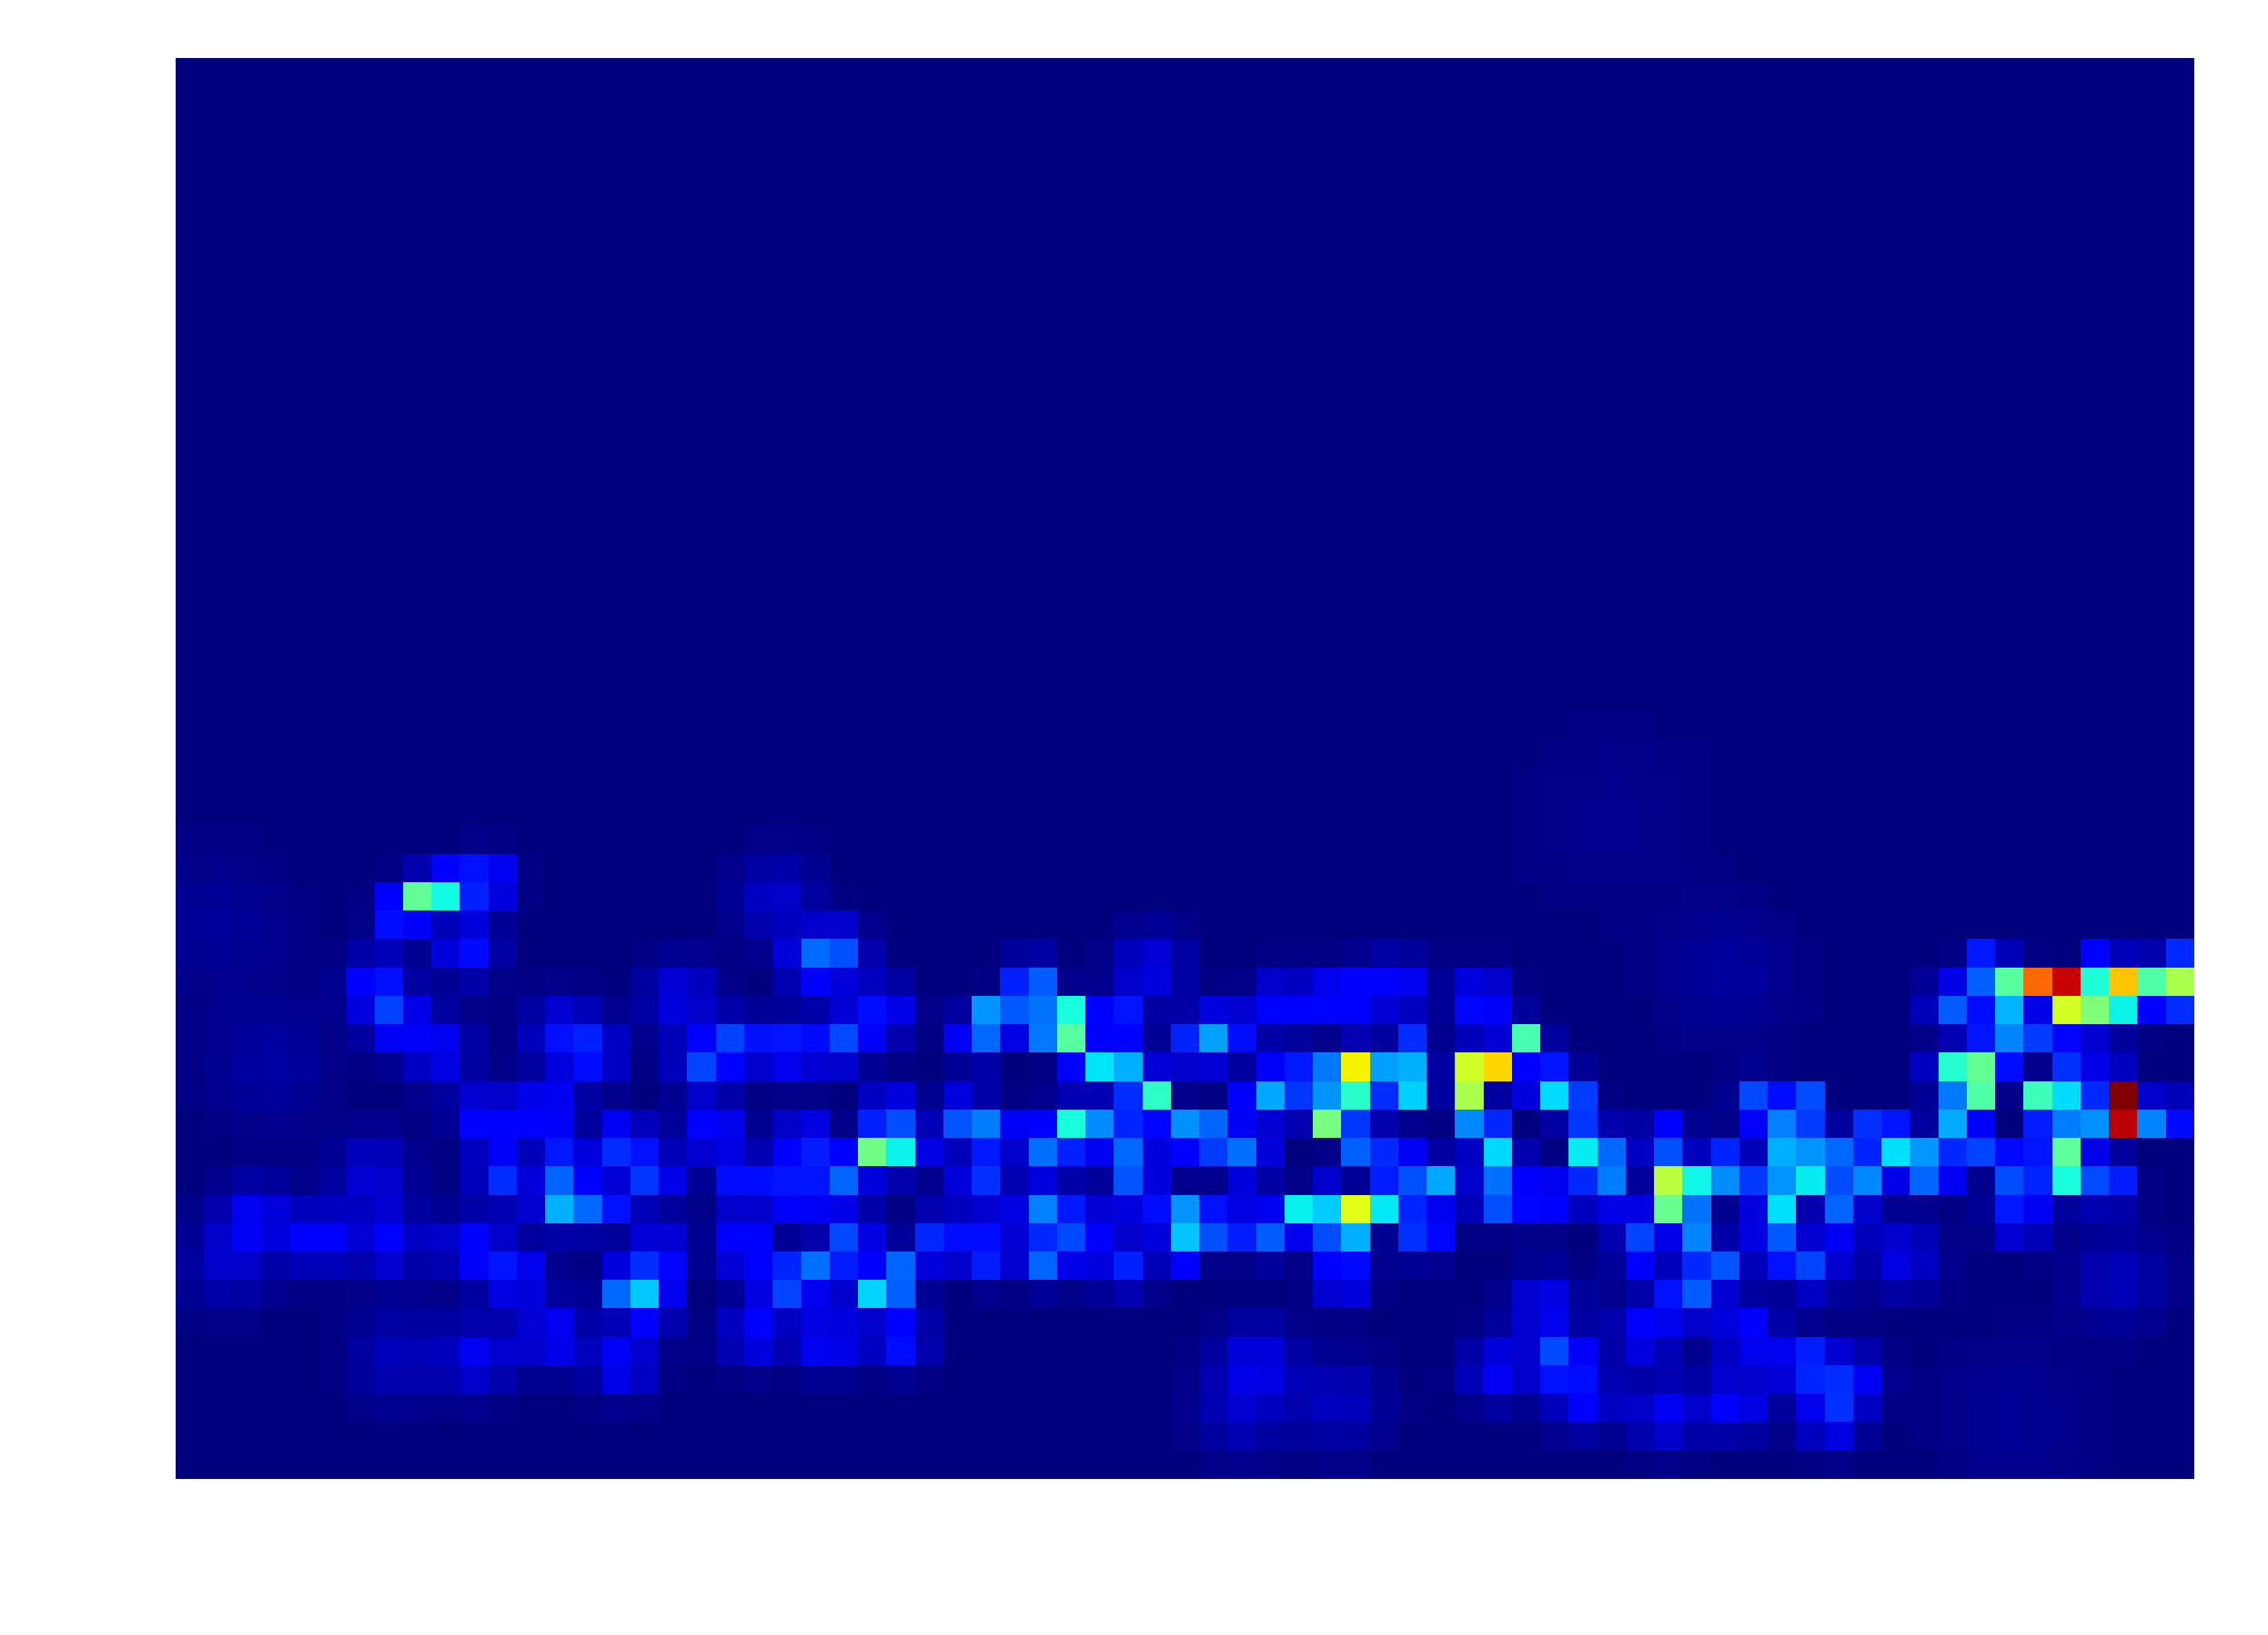

In [11]:
import cv2
groundtruth_resize = cv2.resize(groundtruth,(int(groundtruth.shape[1]/8), int(groundtruth.shape[0]/8)),interpolation = cv2.INTER_CUBIC)*64
show_density(groundtruth_resize, "density_resize.png")

In [12]:
# gt_file = h5py.File(density_map_path,'r')
# groundtruth = np.asarray(gt_file['density'])
# plt.figure(dpi=600)
# plt.axis('off')
# plt.margins(0,0)
# plt.imshow(groundtruth*100, cmap= CM.jet)
# plt.savefig('img262_density.png', dpi=600, bbox_inches='tight',pad_inches=0)# 

In [13]:
type(groundtruth)

numpy.ndarray

In [14]:
# mumber of user
groundtruth.sum()

212.41875

# Annotation


In [15]:
# load img matrix
img = Image.open(image_path)
img_matrix = np.array(img)
img_matrix.shape

(400, 570, 3)

In [16]:

# load point gt from mat
mat = scipy.io.loadmat(mat_path)
img_matrix_annotated = np.copy(img_matrix)
k = np.zeros((img_matrix.shape[0], img_matrix.shape[1]))
gt = mat["image_info"][0, 0][0, 0][0]

In [17]:
gt.shape

(213, 2)

In [18]:
for i in range(0, len(gt)):
    if int(gt[i][1]) < img_matrix_annotated.shape[0] and int(gt[i][0]) < img_matrix_annotated.shape[1]:
        img_matrix_annotated[int(gt[i][1]), int(gt[i][0]), 0] = 255 # annotated point
        # make the point on figure bigger for visual 
        img_matrix_annotated[int(gt[i][1]+1), int(gt[i][0]), 0] = 255 # 
        img_matrix_annotated[int(gt[i][1]), int(gt[i][0]+1), 0] = 255 # 
        img_matrix_annotated[int(gt[i][1]+1), int(gt[i][0]+1), 0] = 255 #         

In [19]:
# #now see a sample from ShanghaiA
# plt.figure(dpi=600, frameon = False)
# plt.axis('off')
# plt.imshow(img_matrix_annotated)

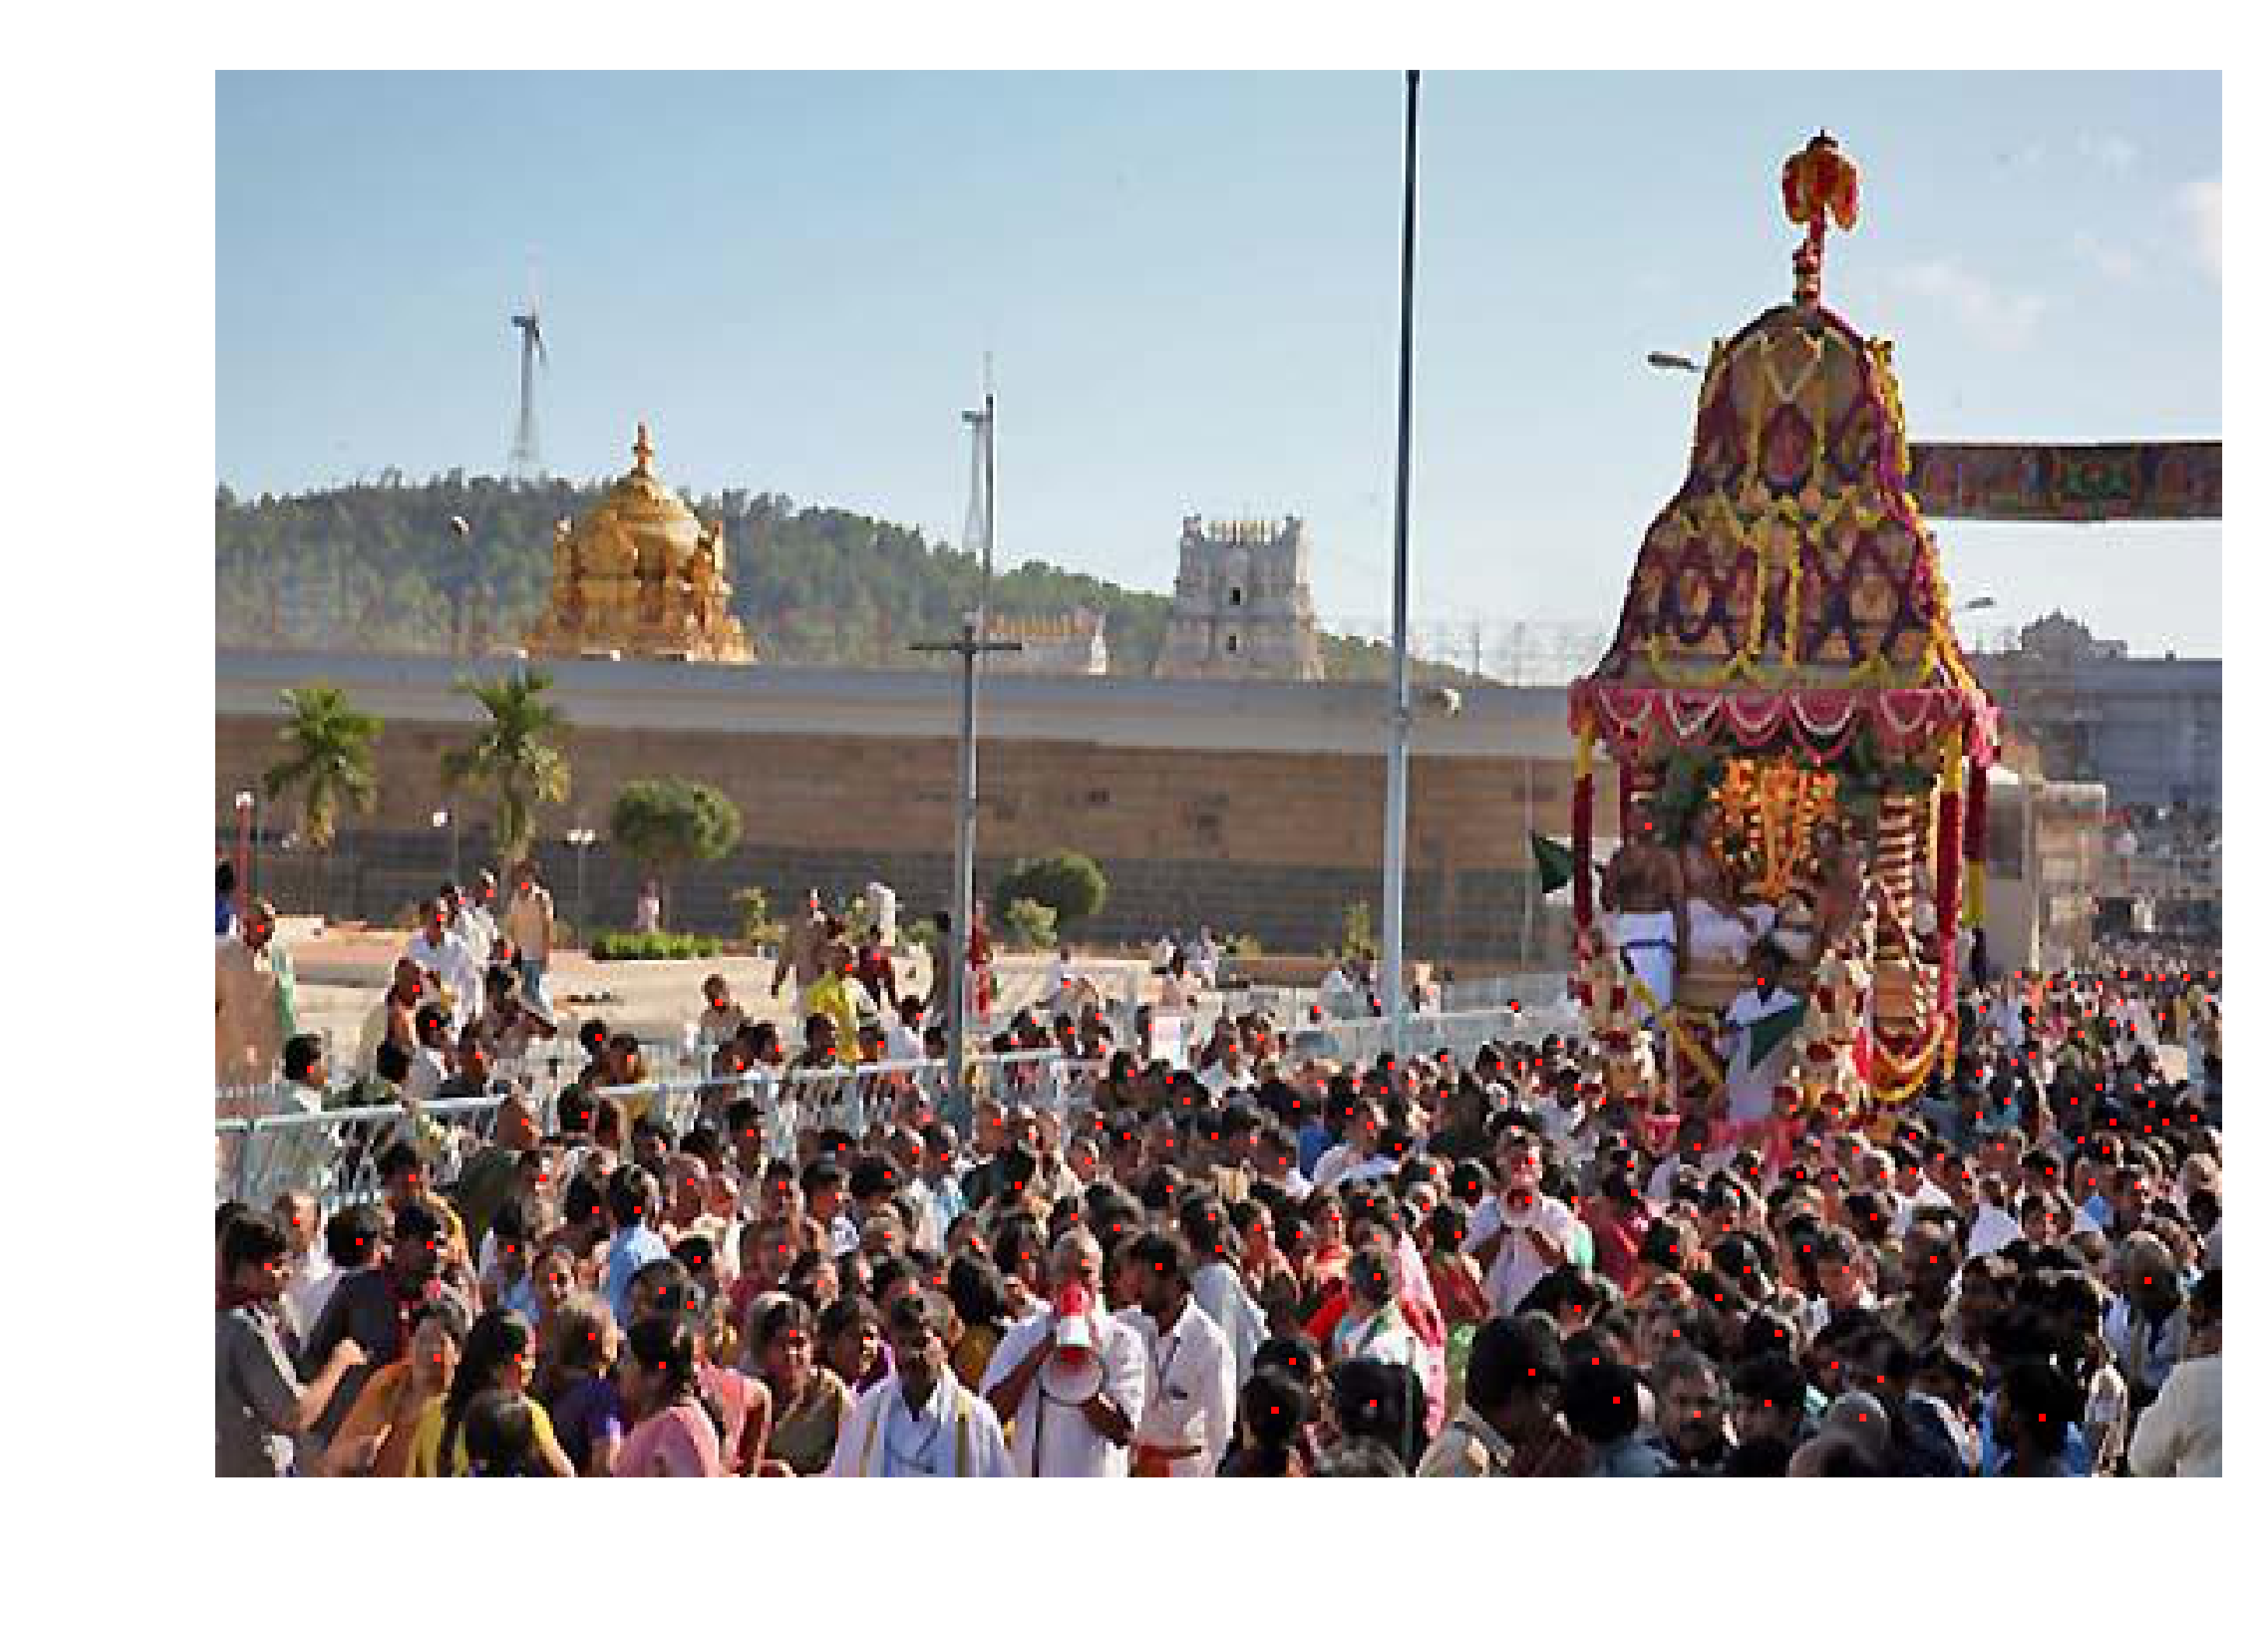

In [20]:
#now see a sample from ShanghaiA
import matplotlib.cm as cm
plt.figure(dpi=600, frameon = False)
plt.axis('off')
plt.margins(0,0)
plt.imshow(img_matrix_annotated)
plt.savefig('img262_annotate.png', dpi=600, bbox_inches='tight',pad_inches=0)